In [9]:
#@title Imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from collections import defaultdict
# make matplotlib big!
matplotlib.rcParams['figure.figsize'] = (9, 9)

def plot_2d_data(X, y):
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')

def plot_2d_classifier(X, y, classifier):
    """Makes a scatter plot of the data points and a background of what the classifier does.
    X is a (n,2) array of data points.
        y is an (n,) array of labels.
        classifier is a function that takes a 2d points
         and gives a label."""
    border = 0.2
    x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
    y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
    num_points = 100
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),
                        np.linspace(y_min, y_max, num_points))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    classes = np.array([classifier(p) for p in grid_points])
    classes = classes.reshape(xx.shape)
    fig = plt.figure(figsize = (6,6))
    plt.contourf(xx, yy, classes, 3, cmap=plt.cm.Spectral, alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# takes in ax as an argument for ease
def plot_2d_classifier_aayan(X, y, classifier, ax):
    """Makes a scatter plot of the data points and a background of what the classifier does.
    X is a (n,2) array of data points.
        y is an (n,) array of labels.
        classifier is a function that takes a 2d point
         and gives a label."""
    border = 0.2
    x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
    y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
    num_points = 100
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),
                        np.linspace(y_min, y_max, num_points))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    classes = np.array([classifier(p) for p in grid_points])
    classes = classes.reshape(xx.shape)
    ax.contourf(xx, yy, classes, 3, cmap=plt.cm.Spectral, alpha=1)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

In [10]:
#@title KNN class

class KNN:
    def __init__(self, k, metric):
        self.k = k
        self.metric = metric

    def train(self, X, y):
        ## X is a (N, D) array, where N is the number of training data points
        ## and D is their dimension
        ## y is a (N,) array of class labels
        self.X = X
        self.y = y
        

    def predict(self, t):
        ## predict the class of the test point t
        ## t is an (D,) dimensional array (a single test point)
        dists = self.metric(self.X, t)
        points = self.y[np.argpartition(dists, self.k)[:self.k]]
        a, b = np.unique(points, return_counts=True)
        return a[np.argmax(b)]

    def predict_batch(self, T):
        ## BONUS TASK: can you get your model to predict the values for a
        #### (M, D) array of multiple test points (all in a vectorized way)
        pass

# Efficient distance function

##### The below bits of code define a bunch of distance functions and sample knn functions, and that is followed by some commented out cells that test them out

In [11]:
N = 5000
D = 700
X_random = np.random.randn(N, D)

In [12]:
def slow_L2_dist(x, y):
    """Squared Euclidean distance between vectors x and y"""
    dist = 0
    for xi, yi in zip(x,y):
        dist += (xi - yi) ** 2
    return dist

def L2_dist(x, y):
    """Squared Euclidean distance between vectors x and y"""
    return np.sum((x - y) ** 2)

def k_nearest_neighbors_slowest(X, t, k):
    dists = [slow_L2_dist(p, t) for p in X]
    return X[np.argsort(dists)][:k]

def k_nearest_neighbors_slow(X, t, k):
    dists = [L2_dist(p, t) for p in X]
    return X[np.argsort(dists)][:k]

## You should not use any Python for loops
def k_nearest_neighbors(X, t, k, xs=1):
    dists = np.sum((X - t) ** 2, axis=xs)
    return X[np.argpartition(dists, k)[:k]]
    # return X[np.argsort(dists)[:k]]
    
def L2_dist_arr(X, t, xs=-1):
    """Squared Euclidean distance between vectors x and y"""
    return np.sum((X - t) ** 2, axis=xs)

def L_n_dist_arr(n):
    def d(X, t, xs=-1):
        return np.sum(np.abs(X - t) ** n, axis=xs)
    return d

In [13]:
# %%time
# k_nearest_neighbors_slowest(X_random, X_random[0], 5)

In [14]:
# %%time
# k_nearest_neighbors_slow(X_random, X_random[0], 5)

In [15]:
# %%time
# k_nearest_neighbors(X_random, X_random[0], 5)

# Visualize close points in image space

In [16]:
## We will not access the test data until the very end
from keras.datasets import mnist, cifar10
(X_train_mnist, y_train_mnist), _ = mnist.load_data()
(X_train_cifar, y_train_cifar), _ = cifar10.load_data()

X_train_mnist = X_train_mnist * 1.0
X_train_cifar = X_train_cifar * 1.0

The below code cells plot the 10 nearest neighbors of images in Mnist and Cifar respectively from the training data


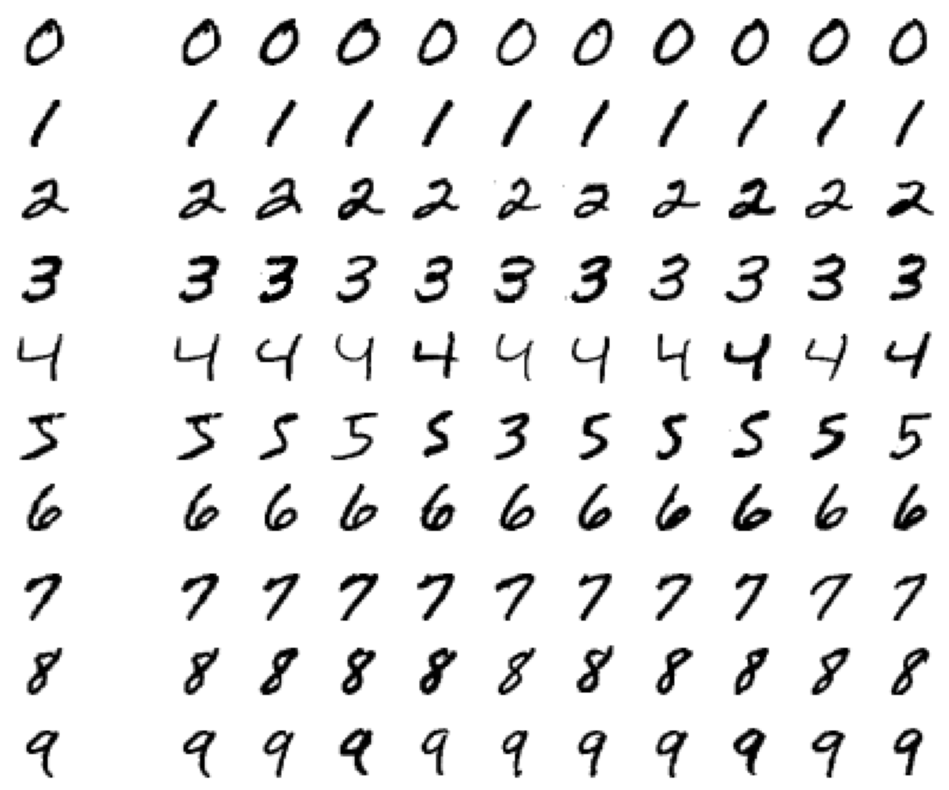

In [17]:
k = 10
n_classes = 10
indicies = [[] for _ in range(n_classes)]
to_do = set(range(n_classes))
for i in range(len(y_train_mnist)):
  if not len(to_do): break
  if len(indicies[y_train_mnist[i]]) != 1:
    indicies[y_train_mnist[i]].append(i)
    to_do.remove(y_train_mnist[i])
fig, ax = plt.subplots(n_classes, k+2, figsize = (k+2, n_classes))
plt.set_cmap("binary")
for i in range(n_classes):
    ax[i][0].imshow(X_train_mnist[indicies[i][0]])
    ax[i][0].axis("off")
    ax[i][1].axis("off")
    nearest = k_nearest_neighbors(X_train_mnist, X_train_mnist[indicies[i][0]], k, xs=(1, 2))
    x = np.argsort(L2_dist_arr(nearest, X_train_mnist[indicies[i][0]], (1, 2)))
    nearest = nearest[x]
    for j in range(k):
      ax[i][j+2].imshow(nearest[j])
      ax[i][j+2].axis("off")
plt.show()


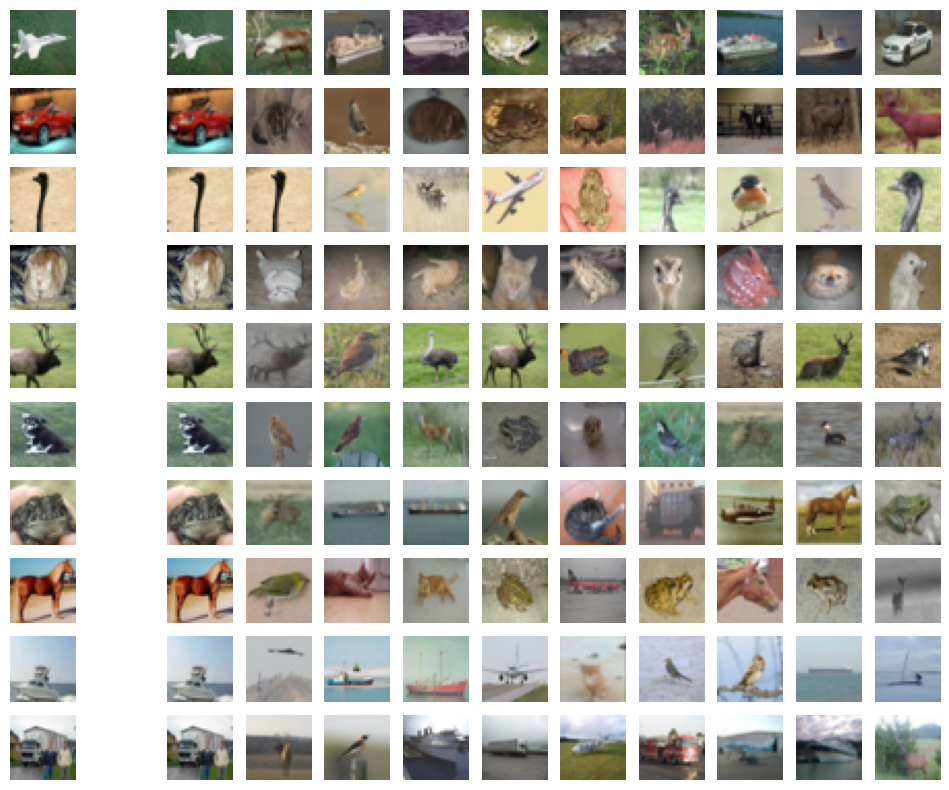

In [18]:
k = 10
n_classes = 10
indicies = [[] for _ in range(n_classes)]
to_do = set(range(n_classes))
# change the below variable for different results
nth_sample = 5
for i in range(len(y_train_cifar)):
  # if not len(to_do): break
  if len(indicies[y_train_cifar[i][0]]) != nth_sample:
    indicies[y_train_cifar[i][0]].append(i)
    # to_do.remove(y_train_cifar[i][0])
fig, ax = plt.subplots(n_classes, k+2, figsize = (k+2, n_classes))
# plt.set_cmap("binary")
for i in range(n_classes):
    ax[i][0].imshow(X_train_cifar[indicies[i][-1]].astype(np.int32))
    ax[i][0].axis("off")
    ax[i][1].axis("off")
    nearest = k_nearest_neighbors(X_train_cifar, X_train_cifar[indicies[i][-1]], k, xs=(1, 2, 3))
    x = np.argsort(L2_dist_arr(nearest, X_train_cifar[indicies[i][-1]], xs=(1, 2, 3)))
    nearest = nearest[x]
    for j in range(k):
      ax[i][j+2].imshow(nearest[j].astype(np.int32))
      ax[i][j+2].axis("off")
plt.show()

# Test KNN on 2d data set

In [19]:
def train_test_split(*arrays, rng_seed = 16, percent_train = 0.8):
    rng = np.random.default_rng(seed=rng_seed)
    l = rng.permutation(len(arrays[0]))
    return [(i[l[:int(percent_train*len(i))]], i[l[int(percent_train*len(i)):]]) for i in arrays]

In [20]:
## Choose an example dataset
def make_spiral_data(num_points, num_classes, rng_seed = 16, rad_mul = 1, rad_off = 20, mul=[1, 1, 1, 5, 10]):
    random.seed(rng_seed)
    """Generate spiral data."""
    angles = list(np.linspace(0, 360, num_classes+1))
    angles.pop(-1)

    # the 2 below can be tweaked for different sorts of spirals, possibly make them kwargs?
    angl_off = 3 # the more this is, the longer the spiral but more spaced out
    noise = 3 # how much randomness there is

    rng = np.random.default_rng(rng_seed)
    n = num_points*num_classes
    ans = np.zeros((n, 2))
    labels = np.zeros(n, dtype=int)

    for i in range(num_points):
        for j in range(num_classes):
            # the radius and angle of our polar points
            rad = rad_mul*i + rad_off
            angl = angles[j]*np.pi/180

            # convert to cartesian
            y = np.sin(angl)*rad
            x = np.cos(angl)*rad
            offset_x, offset_y = rng.normal(scale=noise)*random.choice(mul), rng.normal(scale=noise)*random.choice(mul)

            # affect ans
            ans[i*num_classes + j][0] = x+offset_x
            ans[i*num_classes + j][1] = y+offset_y
            labels[i*num_classes + j] = j
            angles[j] = (angles[j]+angl_off)%360
    return ans, labels
X, y = make_spiral_data(100, 3)
# plot_2d_data(X, y)

In [21]:
def make_n_datasets(num_points, num_classes, n):
    '''
    This allows for more data points
    '''
    X, y = zip(*[make_spiral_data(num_points, num_classes, rng_seed=i+1) for i in range(n)])
    return np.concatenate(X, axis=0), np.concatenate(y, axis=0)

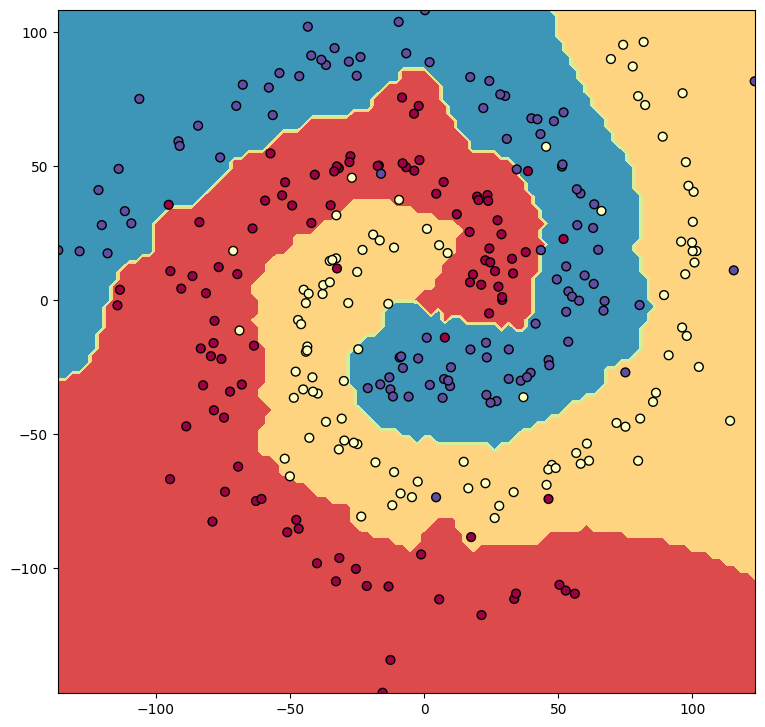

In [22]:
# big plot of a sample KNN
k = 5
model = KNN(k, L2_dist_arr)
model.train(X, y)
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
plot_2d_classifier_aayan(X, y, model.predict, ax)

The below function allows for hyperparameter tuning for all of Mnist, Cifar, and the smaller data shown above.

Using k=9 and the metric L_3 was the best for 3 possible train/test splits, and had an average accuracy of 0.87448
Using k=9 and the metric L_4 was the best for 2 possible train/test splits, and had an average accuracy of 0.87427
Using k=9 and the metric L_2 was the best for 3 possible train/test splits, and had an average accuracy of 0.87333
Using k=9 and the metric L_1 was the best for 2 possible train/test splits, and had an average accuracy of 0.87208
Using k=7 and the metric L_1 was the best for 4 possible train/test splits, and had an average accuracy of 0.87187
Using k=7 and the metric L_2 was the best for 2 possible train/test splits, and had an average accuracy of 0.87167
Using k=7 and the metric L_4 was the best for 0 possible train/test splits, and had an average accuracy of 0.87073
Using k=7 and the metric L_3 was the best for 2 possible train/test splits, and had an average accuracy of 0.87052
Using k=5 and the metric L_1 was the best for 0 possible train/test splits, and 

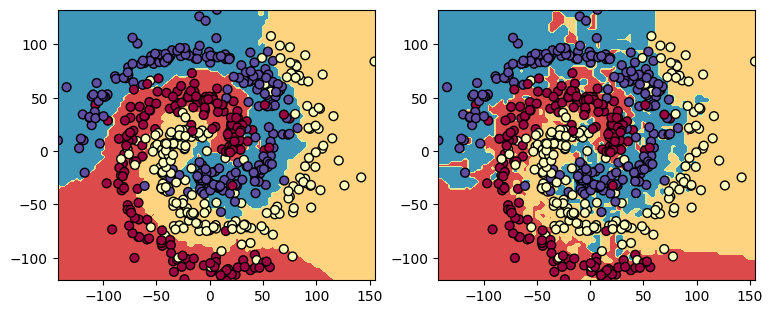

In [23]:
# tuning hyperparams
def hyperParamTune(train_X, train_y, ks, metrics, num_iterations = 20, do_display=1):
    cnt_mx = defaultdict(int)
    cnt_mn = defaultdict(int)
    sm = defaultdict(int)
    cnt = defaultdict(int)
    for _ in range(num_iterations):
        mx = (0, ks[0], metrics[0])
        mn = (100, ks[0], metrics[0])
        (train_X_2, validation_X), (train_y_2, validation_y) = train_test_split(train_X, train_y, rng_seed=random.randint(1, num_iterations*1000))
        train_X_2 = train_X_2*1.0
        validation_X = validation_X*1.0
        for k in ks:
            for d in metrics:
                metric = L_n_dist_arr(d)
                model = KNN(k, metric)
                model.train(train_X_2, train_y_2)
                accuracy = np.mean(np.array([model.predict(i) for i in validation_X]) == validation_y)
                if (accuracy > mx[0]):
                    mx = (accuracy, k, d)
                if accuracy < mn[0]:
                    mn = (accuracy, k, d)
                sm[(k, d)] += accuracy
                cnt[(k, d)] += 1
        cnt_mx[(mx[1], mx[2])] += 1
        cnt_mn[(mn[1], mn[2])] += 1

    # Most accurate models
    l = list(cnt.items())
    l.sort(key = lambda x: -round(sm[x[0]]/x[1], 5))
    if do_display:
        for a in l:
            print(f"Using k={a[0][0]} and the metric L_{round(a[0][1], 3)} was the best for {cnt_mx[a[0]]} possible train/test splits, and had an average accuracy of {round(sm[a[0]]/cnt[a[0]], 5)}")

    ans = [l[0][0], l[-1][0]]

    return ans

X, y = make_n_datasets(100, 3, 10)
(train_X, test_X), (train_y, test_y) = train_test_split(X, y)

metrics = range(1, 5)
ks = range(1, 10, 2)

best, worst = hyperParamTune(train_X=train_X, train_y=train_y, ks=range(1, 10, 2), metrics=range(1, 5))

# Plotting the best hyperparamters on the left, and the worst on the right
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_aspect("equal")
ax2.set_aspect("equal")
model1 = KNN(best[0], L_n_dist_arr(best[1])) # best
model2 = KNN(worst[0], L_n_dist_arr(worst[1])) # worst
model1.train(train_X, train_y)
model2.train(train_X, train_y)
plot_2d_classifier_aayan(test_X, test_y, model1.predict, ax1)
plot_2d_classifier_aayan(test_X, test_y, model2.predict, ax2)

We can check by eye which classifier "seems best", but lets also try to generate data to support that. Split X up into a validation set, and compare accuracy on the validation set over the ranges of hyperparameters you chose above.

# Create validation set and choose hyperparameters for MNIST and CIFAR-10

#### The below cells find the best Mnist and Cifar hyperparameters using the above function

In [24]:
X_train_mnist = np.reshape(X_train_mnist, (len(X_train_mnist), -1))
best, _ = hyperParamTune(train_X=X_train_mnist[:4000], train_y=y_train_mnist[:4000], ks=range(1, 10, 2), metrics=range(1, 4), num_iterations=3)

Using k=1 and the metric L_3 was the best for 3 possible train/test splits, and had an average accuracy of 0.93958
Using k=3 and the metric L_3 was the best for 0 possible train/test splits, and had an average accuracy of 0.93583
Using k=1 and the metric L_2 was the best for 0 possible train/test splits, and had an average accuracy of 0.93125
Using k=3 and the metric L_2 was the best for 0 possible train/test splits, and had an average accuracy of 0.93042
Using k=5 and the metric L_3 was the best for 0 possible train/test splits, and had an average accuracy of 0.92958
Using k=5 and the metric L_2 was the best for 0 possible train/test splits, and had an average accuracy of 0.92667
Using k=7 and the metric L_3 was the best for 0 possible train/test splits, and had an average accuracy of 0.92583
Using k=1 and the metric L_1 was the best for 0 possible train/test splits, and had an average accuracy of 0.9225
Using k=9 and the metric L_3 was the best for 0 possible train/test splits, and h

# Final test accuracy for MNIST and CIFAR-10

In [34]:
X_train_cifar = np.reshape(X_train_cifar, (len(X_train_cifar), -1))
best2, _ = hyperParamTune(train_X=X_train_cifar[:4000], train_y=y_train_cifar[:4000], ks=range(1, 10, 2), metrics=range(1, 4), num_iterations=1)

Using k=1 and the metric L_3 was the best for 1 possible train/test splits, and had an average accuracy of 0.10224
Using k=1 and the metric L_2 was the best for 0 possible train/test splits, and had an average accuracy of 0.10161
Using k=3 and the metric L_3 was the best for 0 possible train/test splits, and had an average accuracy of 0.10125
Using k=7 and the metric L_3 was the best for 0 possible train/test splits, and had an average accuracy of 0.10124
Using k=1 and the metric L_1 was the best for 0 possible train/test splits, and had an average accuracy of 0.10122
Using k=5 and the metric L_2 was the best for 0 possible train/test splits, and had an average accuracy of 0.10114
Using k=7 and the metric L_1 was the best for 0 possible train/test splits, and had an average accuracy of 0.10114
Using k=3 and the metric L_2 was the best for 0 possible train/test splits, and had an average accuracy of 0.10108
Using k=9 and the metric L_2 was the best for 0 possible train/test splits, and 

In [36]:
_, (X_test_mnist, y_test_mnist) = mnist.load_data()
_, (X_test_cifar, y_test_cifar) = cifar10.load_data()
X_test_mnist = np.reshape(X_test_mnist, (len(X_test_mnist), -1))
X_test_cifar = np.reshape(X_test_cifar, (len(X_test_cifar), -1))

In [40]:
print(f'Best for Mnist: k={best[0]}, L{best[1]} \nBest for Cifar: k={best2[0]}, L{best2[1]}')

Best for Mnist: k=1, L3 
Best for Cifar: k=1, L3


In [1]:
# Compute Mnist Accuracy
model = KNN(best[0], L_n_dist_arr(best[1]))
model.train(X_train_mnist[:4000], y_train_mnist[:4000])
mnist_accuracy = np.mean(np.array([model.predict(i) for i in X_test_mnist]) == y_test_mnist)
print("Mnist:", mnist_accuracy)


NameError: name 'KNN' is not defined

In [37]:
# Compute Cifar Accuracy
model = KNN(1, L_n_dist_arr(3))
model.train(X_train_cifar[:4000], y_train_cifar[:4000])
cifar_accuracy = np.mean(np.array([model.predict(i) for i in X_test_cifar]) == y_test_cifar)
print("Cifar:", cifar_accuracy)

KeyboardInterrupt: 

# References

## Resources Used

Mention any resources used while working on this assignments (include links, mention people, put in LLM queries)

- [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

- Classmates (Jasper in particular)

- matplotlib and numpy documentation
